# Research questions:
---
Shark related attacks according to sex.
- Shark related attacks according to sex, throughout history

Shark related deaths according to sex.
- Shark related deaths according to sex, throughout history

PIRATE KIDS:
- Shark related infant deaths according to sex throughout history
---
**Bonus question:**
- Morning bird-shark: What is a shark's favourite meal?
---

## Libraries

In [1]:
import pandas as pd
import seaborn as sns

## Subset with variables of interest

In [2]:
attacks = pd.read_csv("../data/attacks.csv", encoding = "unicode_escape")
df = attacks[["Year", "Sex ", "Fatal (Y/N)", "Age", "Time"]]

In [3]:
df.duplicated().sum()

20940

In [4]:
df.drop_duplicates(inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\3424306917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape # 4783 unique subjects

(4783, 5)

In [7]:
df.isna().sum()

Year              3
Sex             377
Fatal (Y/N)     460
Age            1397
Time           1885
dtype: int64

### Cleaning of "Year" (only 3 NaN)

In [8]:
df["Year"].describe()

count    4780.000000
mean     1961.906276
std       151.480634
min         0.000000
25%      1955.750000
50%      1988.000000
75%      2007.000000
max      2018.000000
Name: Year, dtype: float64

In [9]:
df["Year"][df["Year"] == df["Year"].min()].index # 23 subjects with Year 0 (plus 3 na)

Index([6177, 6181, 6184, 6185, 6189, 6193, 6198, 6200, 6202, 6226, 6228, 6232,
       6238, 6239, 6241, 6242, 6243, 6254, 6259, 6265, 6276, 6277, 6301],
      dtype='int64')

In [10]:
df[df["Year"] == 0] = None

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\3796636323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Year"] == 0] = None


In [11]:
df["Year"].describe()

count    4757.000000
mean     1971.392054
std        65.979031
min         5.000000
25%      1956.000000
50%      1988.000000
75%      2007.000000
max      2018.000000
Name: Year, dtype: float64

In [12]:
df.sort_values(by = "Year").head()

,Year,Sex,Fatal (Y/N),Age,Time
6176,5.0,M,N,NaN,NaN
6175,77.0,M,Y,NaN,NaN
6174,500.0,M,N,NaN,NaN
6173,1543.0,M,Y,NaN,NaN
6172,1554.0,M,UNKNOWN,NaN,NaN


In [13]:
df[(df["Year"] == 5) | (df["Year"] == 77) | (df["Year"] == 500)] = None

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\634795524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df["Year"] == 5) | (df["Year"] == 77) | (df["Year"] == 500)] = None


In [14]:
df.shape # 4783 unique subjects

(4783, 5)

In [15]:
sns.set(rc={"figure.figsize": (5, 4)})
sns.set_style("whitegrid")

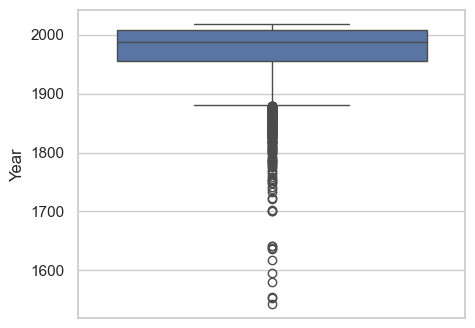

In [16]:
sns.boxplot(y = "Year", data = df); # There is not much information about shark attacks previous to 1880

### Cleaning of "Sex" (377 NaN)

In [17]:
df.rename({"Sex ":"Sex"}, axis = 1, inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\3981233909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({"Sex ":"Sex"}, axis = 1, inplace = True)


In [18]:
df["Sex"].describe() # 6 different categories

count     4383
unique       6
top          M
freq      3783
Name: Sex, dtype: object

In [19]:
df["Sex"].value_counts()

Sex
M      3783
F       594
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

In [20]:
df[(df["Sex"] == "M ") | (df["Sex"] == "N") | (df["Sex"] == "lli") | (df["Sex"] == ".")]

,Year,Sex,Fatal (Y/N),Age,Time
563,2014.0,M,N,42,15h30
1587,2005.0,M,N,NaN,NaN
1624,2004.0,lli,N,38,13h30
4938,1934.0,N,N,NaN,NaN
5437,1908.0,.,Y,NaN,NaN
6131,1801.0,N,Y,NaN,NaN


In [21]:
df[df["Sex"] == "M "] = "M"
df[(df["Sex"] == "N") | (df["Sex"] == "lli") | (df["Sex"] == ".")] = None

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\2960946067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Sex"] == "M "] = "M"
C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\2960946067.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'M' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[df["Sex"] == "M "] = "M"
C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\2960946067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [22]:
df["Sex"].value_counts()

Sex
M    3785
F     594
Name: count, dtype: int64

In [23]:
df["Sex"].isna().sum() # 404 subjects with unknown sex of a total of 4783. More than half the amount of "F".
                           # Not imputable.

404

### Cleaning of "Fatal (Y/N)" (460 NaN)

In [24]:
df.rename({"Fatal (Y/N)":"Fatal"}, axis = 1, inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\2859628926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename({"Fatal (Y/N)":"Fatal"}, axis = 1, inplace = True)


In [25]:
df["Fatal"].describe() # 8 different categories

count     4294
unique       8
top          N
freq      3249
Name: Fatal, dtype: object

In [26]:
df["Fatal"].value_counts()

Fatal
N          3249
Y           971
UNKNOWN      61
 N            7
M             3
2017          1
N             1
y             1
Name: count, dtype: int64

In [27]:
df[(df["Fatal"] == " N") | (df["Fatal"] == "M") | (df["Fatal"] == "2017") | (df["Fatal"] == "N ") | (df["Fatal"] == "y")]

,Year,Sex,Fatal,Age,Time
285,2016.0,M,M,22,Morning
563,M,M,M,M,M
786,2012.0,M,2017,57,Morning
1587,M,M,M,M,M
3942,1960.0,F,N,27,NaN
3944,1960.0,M,N,33,09h00
3946,1960.0,M,N,41,14h45
3948,1960.0,M,N,17,15h00
3949,1960.0,M,N,24,NaN
3951,1960.0,M,N,NaN,NaN


In [28]:
df[(df["Fatal"] == " N") | (df["Fatal"] == "N ") | (df["Fatal"] == "M")] = "N"
df[df["Fatal"] == "y"] = "Y"
df[(df["Fatal"] == "2017") | (df["Fatal"] == "UNKNOWN")] = None

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\2794069139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(df["Fatal"] == " N") | (df["Fatal"] == "N ") | (df["Fatal"] == "M")] = "N"
C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\2794069139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Fatal"] == "y"] = "Y"
C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\2794069139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [29]:
df["Fatal"].value_counts()

Fatal
N    3260
Y     972
Name: count, dtype: int64

In [30]:
df["Fatal"].isna().sum() # 551 subjects with unknown sex of a total of 4783. More than half the amount of fatal attacks
                                        # Not imputable.

551

### Cleaning of "Age" (1397 NaN)

Time           1885

In [31]:
# df["Age"] = pd.to_numeric(df["Age"])
df.Age.info()

<class 'pandas.core.series.Series'>
Index: 4783 entries, 0 to 6302
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
3365 non-null   object
dtypes: object(1)
memory usage: 74.7+ KB


ISSUES:
- Years ending with an 's' with or without apostrophe (40's, 20s) - > They are trasnformed as half the period they refer to (45 or 25): `(\d{1,2})'?s`
- "Teen", "teen", "Teens" - > Transform to 15 years
- "N" - > Transform to NaN
- "18 months" - > Transform to 1
- "28 & 26" - > Probably refering to two incidents occurring at the same time, but exlained together. Transform to 27
- "18 or 20" - > Transform to 19
- "12 or 13" - > Transform to 13
- "46 & 34" - > Probably refering to two incidents occurring at the same time, but exlained together. Transform to 40
- "28, 23 & 30" - > Transform to 27
- "36 & 26" - > Transform to 31
- "8 or 10" -> Transform to 9
- " " - > Transform to NaN
- "\xa0 " - > Transform to NaN
- "30 or 36" - > Transform to 33
- "6½" - > Transform to 6
- "21 & ?" - > Transform to 21
- "33 or 37" - > Transform to 35
- "23 & 20" - > Transform to 22
- "7      &    31" - > Too different, shouldn't be treated as same individual. 


In [32]:
df["col1"] = df["Age"].str.extract("(\d{1,2})'?s")

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\3714912794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"] = df["Age"].str.extract("(\d{1,2})'?s")


In [33]:
df["col1"] = pd.to_numeric(df["col1"]) + 5

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\2478760014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"] = pd.to_numeric(df["col1"]) + 5


In [34]:
df["col1"] = df["col1"].astype("object")

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\4221263905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["col1"] = df["col1"].astype("object")


In [35]:
df["col1"][df["col1"].notna()].index

Index([  48,  150,  194,  219,  468,  502,  509,  522,  743,  881, 1481, 1483,
       1526, 1625, 1955, 2496, 2634, 2635, 2895, 2966, 3082, 3289, 5061],
      dtype='int64')

In [36]:
# To assign values of col1 in column Age only if col1 is not na:
    # df.loc(indexes where col1 is not na, in column Age) = df.loc(indexes qhere col1 is not na, in column col1)
df.loc[df["col1"][df["col1"].notna()].index, "Age"] = df.loc[df["col1"][df["col1"].notna()].index, "col1"]

In [37]:
df.drop(["col1"], axis = 1, inplace = True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_8096\1224089297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["col1"], axis = 1, inplace = True)


In [38]:
df["Age"][df["Age"] == "Teen"].index

Index([182, 294, 526, 983, 1331, 1658, 3643, 5002, 5544], dtype='int64')

In [55]:
df.loc[df["Age"][(df["Age"] == "Teen") | (df["Age"] == "teen") | (df["Age"] == "Teens")].index, "Age"] = "15"
df.loc[df["Age"][(df["Age"] == "N") | (df["Age"] == " ") | (df["Age"] == "\xa0 ")].index, "Age"] = None
df.loc[df["Age"][df["Age"] == "18 months"].index, "Age"] = "1"
df.loc[df["Age"][df["Age"] == "28 & 26"].index, "Age"] = "27"
df.loc[df["Age"][df["Age"] == "18 or 20"].index, "Age"] = "19"
df.loc[df["Age"][df["Age"] == "12 or 13"].index, "Age"] = "13"
df.loc[df["Age"][df["Age"] == "46 & 34"].index, "Age"] = "40"
df.loc[df["Age"][df["Age"] == "28, 23 & 30"].index, "Age"] = "27"
df.loc[df["Age"][df["Age"] == "36 & 26"].index, "Age"] = "31"
df.loc[df["Age"][df["Age"] == "8 or 10"].index, "Age"] = "9"
df.loc[df["Age"][df["Age"] == "30 or 36"].index, "Age"] = "33"
df.loc[df["Age"][df["Age"] == "6½"].index, "Age"] = "6"
df.loc[df["Age"][df["Age"] == "21 & ?"].index, "Age"] = "21"
df.loc[df["Age"][df["Age"] == "33 or 37"].index, "Age"] = "35"
df.loc[df["Age"][df["Age"] == "23 & 20"].index, "Age"] = "22"



In [56]:
df["Age"] = pd.to_numeric(df["Age"])

ValueError: Unable to parse string "7      &    31" at position 2127

In [46]:
print(df.iloc[1669].Age)

30 or 36
